### 1. Загрузим данные и подготовим их к анализу

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 1.1. Импорт библиотек pandas, numpy, datetime, matplotlib.pyplot, seaborn

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns', None) #настройка, чтобы pandas не урезал столбцы

#### 1.2. Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные

In [3]:
visits, orders, costs = (
    pd.read_csv('/content/drive/MyDrive/Data/visits_info_short.csv'),  # визиты
    pd.read_csv('/content/drive/MyDrive/Data/orders_info_short.csv'),  # заказы
    pd.read_csv('/content/drive/MyDrive/Data/costs_info_short.csv'),  # траты на рекламу
)

#### 1.3. Изучим данные в датафреме visits

In [4]:
display(visits.head(10))
visits.info();

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


##### 1.3.1. Заменим названия столбцов в датафреме visits (приведем к нижнему регистру и переименуем столбцы)

In [5]:
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns={'user id': 'user_id', 'session start': 'session_start', 'session end': 'session_end'})

##### 1.3.2. Преобразуем данные о времени в датафреме visits

In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

##### 1.3.3. Проверим датафрем visits на пропуски и дубликаты

In [7]:
print(visits.isna().sum())
print(visits.duplicated().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64
0


In [8]:
#найдем уникальные значения и их количество в столбце region:
print(visits['region'].value_counts())

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64


In [9]:
#найдем уникальные значения и их количество в столбце device:
print(visits['device'].value_counts())

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64


In [10]:
#найдем уникальные значения и их количество в столбце channel:
print(visits['channel'].value_counts())

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64


#### 1.4. Изучим данные в датафреме orders

In [11]:
display(orders.head(10))
orders.info();

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


##### 1.4.1. Заменим названия столбцов в датафреме orders (приведем к нижнему регистру и переименуем столбцы)

In [12]:
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'})

##### 1.4.2. Преобразуем данные о времени в датафреме orders

In [13]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

##### 1.4.3. Проверим датафрем orders на пропуски и дубликаты

In [14]:
print(orders.isna().sum())
print(orders.duplicated().sum())

user_id     0
event_dt    0
revenue     0
dtype: int64
0


#### 1.5. Изучим данные в датафреме costs

In [15]:
display(costs.head(10))
costs.info();

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


##### 1.5.1. Заменим названия столбцов в датафреме costs (приведем к нижнему регистру )

In [16]:
costs.columns = costs.columns.str.lower()

##### 1.5.2. Преобразуем данные о времени в датафреме costs

In [17]:
costs['dt'] = pd.to_datetime(costs['dt'])

##### 1.5.3. Проверим датафрем costs на пропуски и дубликаты

In [18]:
print(costs.isna().sum())
print(costs.duplicated().sum())

dt         0
channel    0
costs      0
dtype: int64
0


In [19]:
#найдем уникальные значения и их количество в столбце channel:
print(costs['channel'].value_counts())

FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64


В датафремах visits, orders, costs были заменены названия столбцов (все буквы приведены к нижнему регистру, а также изменены некоторые наименования). Были преобразованы данные о времени. Проведена проверка на наличие пропусков и дубликатов: пропуски и дубликаты не обнаружены.

### 2. Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.


#### 2.1. Соберём функции для создания профилей, расчёта удержания, конверсии, LTV и ROI: get_profiles(), get_retention(), get_conversion() и get_ltv().

##### 2.1.1. get_profiles() — функция для создания профилей пользователей

In [20]:
def get_profiles(visits, orders, ad_costs):
    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts

    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first','region':'first', 'device':'first', 'channel': 'first'})
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['dt'] = pd.to_datetime(profiles['dt'])

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


##### 2.1.2. get_retention() — функция для расчета коэффициента удержания (Retention Rate)

In [21]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### 2.1.3. get_conversion() — функция для расчета конверсии

In [22]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### 2.1.4. get_ltv() — функция для расчета LTV и ROI

In [23]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### 2.2. Зададим функции для визуализации метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

##### 2.2.1. filter_data() — функция для сглаживания фрейма

In [24]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

##### 2.2.2. plot_retention() — функция для визуализации удержания

In [25]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

##### 2.2.3. plot_conversion() — функция для визуализации конверсии

In [26]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

##### 2.2.4. plot_ltv_roi() — функция для визуализации LTV и ROI

In [27]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### 3. Исследовательский анализ данных

#### 3.1. Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [28]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,region,device,channel,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,United States,Mac,FaceBoom,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,United States,iPhone,FaceBoom,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,France,iPhone,organic,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,Germany,PC,AdNonSense,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,United States,iPhone,YRabbit,2019-10-02,2019-10-02 00:07:44,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,United States,iPhone,TipTop,2019-09-28,2019-09-28 08:33:02,False,3.500000
150004,999975439887,2019-10-21 00:35:17,UK,PC,organic,2019-10-21,2019-10-21 00:35:17,False,0.000000
150005,999976332130,2019-07-23 02:57:06,United States,iPhone,TipTop,2019-07-23,2019-07-23 02:57:06,False,2.600000
150006,999979924135,2019-09-28 21:28:09,United States,PC,MediaTornado,2019-09-28,2019-09-28 21:28:09,False,0.205714


Результат — 150 008 пользовательских профилей, в каждом из которых есть данные о дате первого посещения, рекламном источнике, который мотивировал пользователя зайти в приложение, регионе и устройстве, с котрого был осуществлен вход в приложение.

In [29]:
#Определим минимальноую и максимальную даты для привлечения пользователей
min_date = profiles['dt'].min() # datetime(2019, 5,1).date()
max_date = profiles['dt'].max() # datetime(2019, 10, 27).date()
print('Минимальная дата привлечения пользователей', min_date)
print('Максимальная дата привлечения пользователей', max_date)

Минимальная дата привлечения пользователей 2019-05-01 00:00:00
Максимальная дата привлечения пользователей 2019-10-27 00:00:00


#### 3.2. Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

In [30]:
profiles.groupby('region').agg(
    {'user_id': 'nunique', 'payer':'mean'}).sort_values(by='payer', ascending =False)


,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


Большинство пользователей в основном приходят их США (United States), т.е. примерно 67% от количества всех пользователей. Пользователей из Великобритании (UK) и Франции (France) 12% и 11% соответсвенно. Пользвателей из Германии (Germany) меньше всего - 10% от количества всех пользователей.

Самая большая доля платящих пользователей из США (7%). Доли платящих пользовтаелей из Германии, Великобритании и Франции примерно на одном уровне и составляют 4.11%, 3.98% и 3.8% соответсвенно).

#### 3.3. Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [31]:
profiles.groupby('device').agg(
    {'user_id': 'nunique', 'payer':'mean'}).sort_values(by='payer', ascending =False)

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


Около 36% пользователей используют для входа в приложение iPhone, около 23% - Android, 21% -PC и 20% - Mac. Т.е. самым популярным устройством является iPhone, а самым не популярным - Mac.

Но при этом, самая большая доля платящих пользователей используют Mac (6.36%). Доля платящих пользовталей, использующих iPhone, составляет 6.21%, Android - 5.85% и PC - 5,05%.

#### 3.4. Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.

In [32]:
profiles.groupby('channel').agg(
    {'user_id': 'nunique', 'payer':'mean'}).sort_values(by='payer', ascending =False)

,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


Около 38% пользователей приходят из бесплатных источников (пользоватлеи находят приложение самостоятельно, без использования рекламы), но доля платящих из них самая маленькая - около 2.06%.

Около 19% пользовталей находят приложение через рекламу на FaceBoom, доля платящих из них самая высокая - более 12%.
Около 13% пользователй находят приложение через рекламу на TipTop, доля платящих из них составляет около 9.6%, что являеется довольно высоким показателем (4ое место).

Всего 2.6% пользователей приходят с рекламы на AdNonSense, однако доля платящих из них 11.3%, что является вторым результатом.
Пользовтатей с рекламы на lambdaMediaAds меньше всего (1.4%), но доля платящих из них имеет третий результат в таблице - 10.5%.

### 4. Маркетинг

#### 4.1. Посчитаем общую сумму расходов на маркетинг.

In [33]:
print(round(costs['costs'].sum(),2))

105497.3


Всего на рекламу было потрачено 105 497.3

#### 4.2. Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [34]:
costs.groupby('channel').agg(
    {'costs':'sum'}).sort_values(by='costs', ascending =False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Больше всего потратили на рекламу в TipTop (около 52% от общего бюджета на рекламу). Около 31% было потрачено на рекламу в FaceBoom.
Меньше всего потратили на рекламу MediaTornado и YRabbit (менее 1% от общего бюджета)

#### 4.3. Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [35]:
costs['week'] = costs['dt'].dt.isocalendar().week #добавим столбец с номерами недели
costs['month'] = costs['dt'].astype('datetime64[M]') #добавим столбец с месяцами
costs

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,2019-05-01
1,2019-05-02,FaceBoom,78.1,18,2019-05-02
2,2019-05-03,FaceBoom,85.8,18,2019-05-03
3,2019-05-04,FaceBoom,136.4,18,2019-05-04
4,2019-05-05,FaceBoom,122.1,18,2019-05-05
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,43,2019-10-23
1796,2019-10-24,lambdaMediaAds,6.4,43,2019-10-24
1797,2019-10-25,lambdaMediaAds,8.8,43,2019-10-25
1798,2019-10-26,lambdaMediaAds,8.8,43,2019-10-26


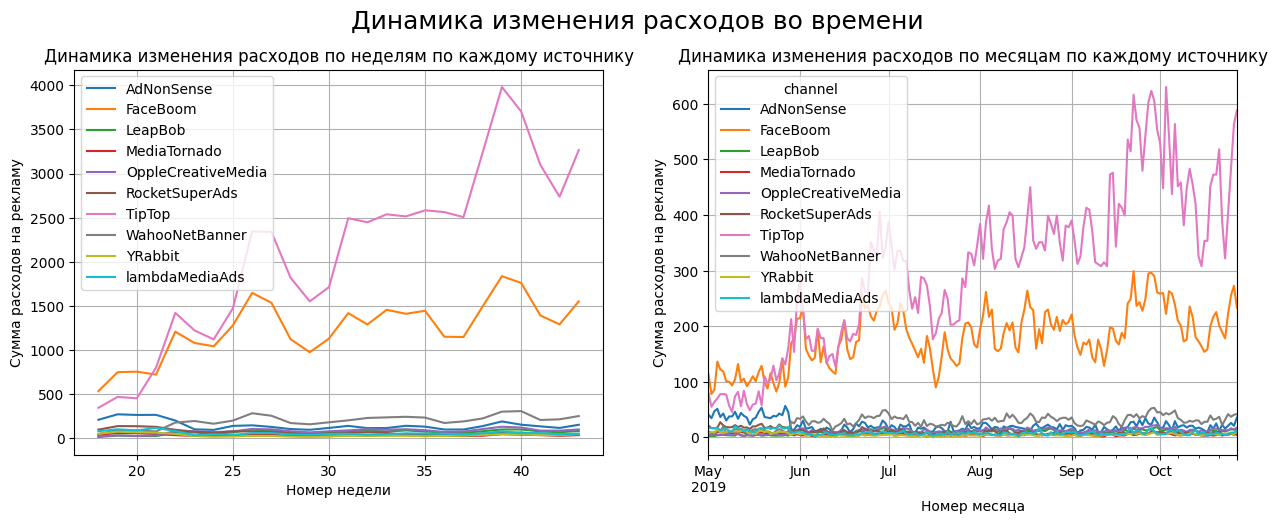

In [36]:
weekly_costs = costs.pivot_table(
    index='week',  # неделя
    columns='channel',  # рекламные источники
    values='costs',  # расходы на рекламу
    aggfunc='sum'  #подсчёт суммы расходов
)

monthly_costs = costs.pivot_table(
    index='month',  # месяц
    columns='channel',  # рекламные источники
    values='costs',  # расходы на рекламу
    aggfunc='sum'  #подсчёт суммы расходов
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Динамика изменения расходов во времени', y=1.00, fontsize=18)
weekly_costs.plot(grid=True, ax=ax1)
ax1.set_title('Динамика изменения расходов по неделям по каждому источнику')
ax1.set_xlabel('Номер недели')
ax1.set_ylabel('Сумма расходов на рекламу')
monthly_costs.plot(grid=True, ax=ax2)
ax1.legend()
ax2.set_xlabel('Номер месяца')
ax2.set_ylabel('Сумма расходов на рекламу')
ax2.set_title('Динамика изменения расходов по месяцам по каждому источнику');

Расходы на рекламу по источнику TipTop на обоих графиках показывают рост с течением времени. Т.е. расходы увеличивались до сентября 2019 года , а затем пошли на спад. Самые большие расходы были на 39 неделе около 4000 и в сенятбре 2019 - более 12000.
Расходы на рекламу FaceBoom росли до 26 недели, затем стабилизировались и деражались в промежутке между 1000 и 2000.
В графике по месяцам видно, что рост расходов был с мая по июнь 2019 до 5000, а затем держаля в диапазоне от 5000 до 7000.

Расходы на другие источники не превышают 500 на недельном графике и 1000 на месячном графике. Колебания величины расходов незначительное.

#### 4.4. Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

Откорректируем функцию get_profiles() и добавим в нее новый аргумент costs.
Изменения в функции позволят выести отдельный столбец со стоимостью привлечения каждого пользователя acquisition_cost

In [37]:
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,region,device,channel,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,United States,Mac,FaceBoom,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,United States,iPhone,FaceBoom,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,France,iPhone,organic,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,Germany,PC,AdNonSense,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,United States,iPhone,YRabbit,2019-10-02,2019-10-02 00:07:44,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,United States,iPhone,TipTop,2019-09-28,2019-09-28 08:33:02,False,3.500000
150004,999975439887,2019-10-21 00:35:17,UK,PC,organic,2019-10-21,2019-10-21 00:35:17,False,0.000000
150005,999976332130,2019-07-23 02:57:06,United States,iPhone,TipTop,2019-07-23,2019-07-23 02:57:06,False,2.600000
150006,999979924135,2019-09-28 21:28:09,United States,PC,MediaTornado,2019-09-28,2019-09-28 21:28:09,False,0.205714


Выясним, как меняется стоимость привлечения для каждого источника от когорты к когорте. Для этого построим сводную таблицу, в которой названиями строк будут даты привлечения пользователей, названиями столбцов — каналы привлечения, а значениями — средний CAC, и построим по ней график истории изменений.

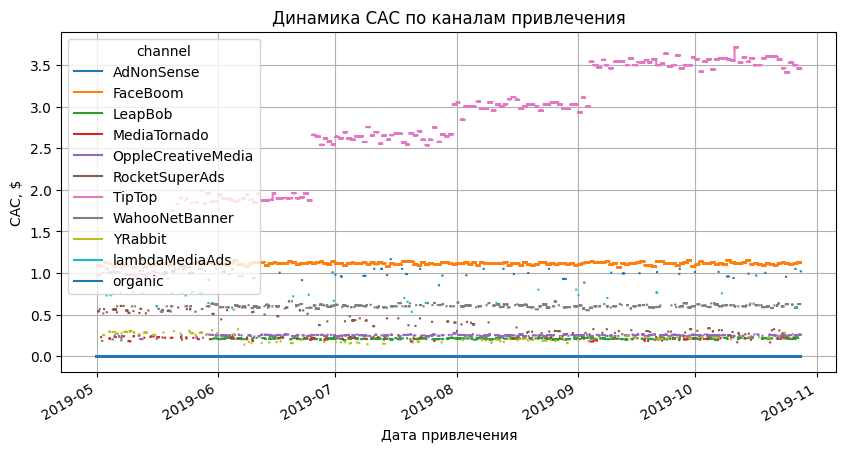

In [38]:
# строим график истории изменений CAC по каналам привлечения
profiles.pivot_table(
    index='month', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

In [39]:
# считаем средний CAC по каналам привлечения
cac = (
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'}).sort_values(by='cac', ascending =False)
)
cac

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Расчитала среднее значение САС у каждого канала за все время рекламной компании.
Самые большие средние затраты на рекламу у источника TipTop ($2.8).
Далее примерно на одном уровне (около $1) у источников FaceBoom и AdNonSense.
Самый низкий расход на рекламу у источников YRabbit, Media Tornado и LeapBob (около $ 0.2).





### 5. Оценим окупаемость рекламы

#### 5.1. Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

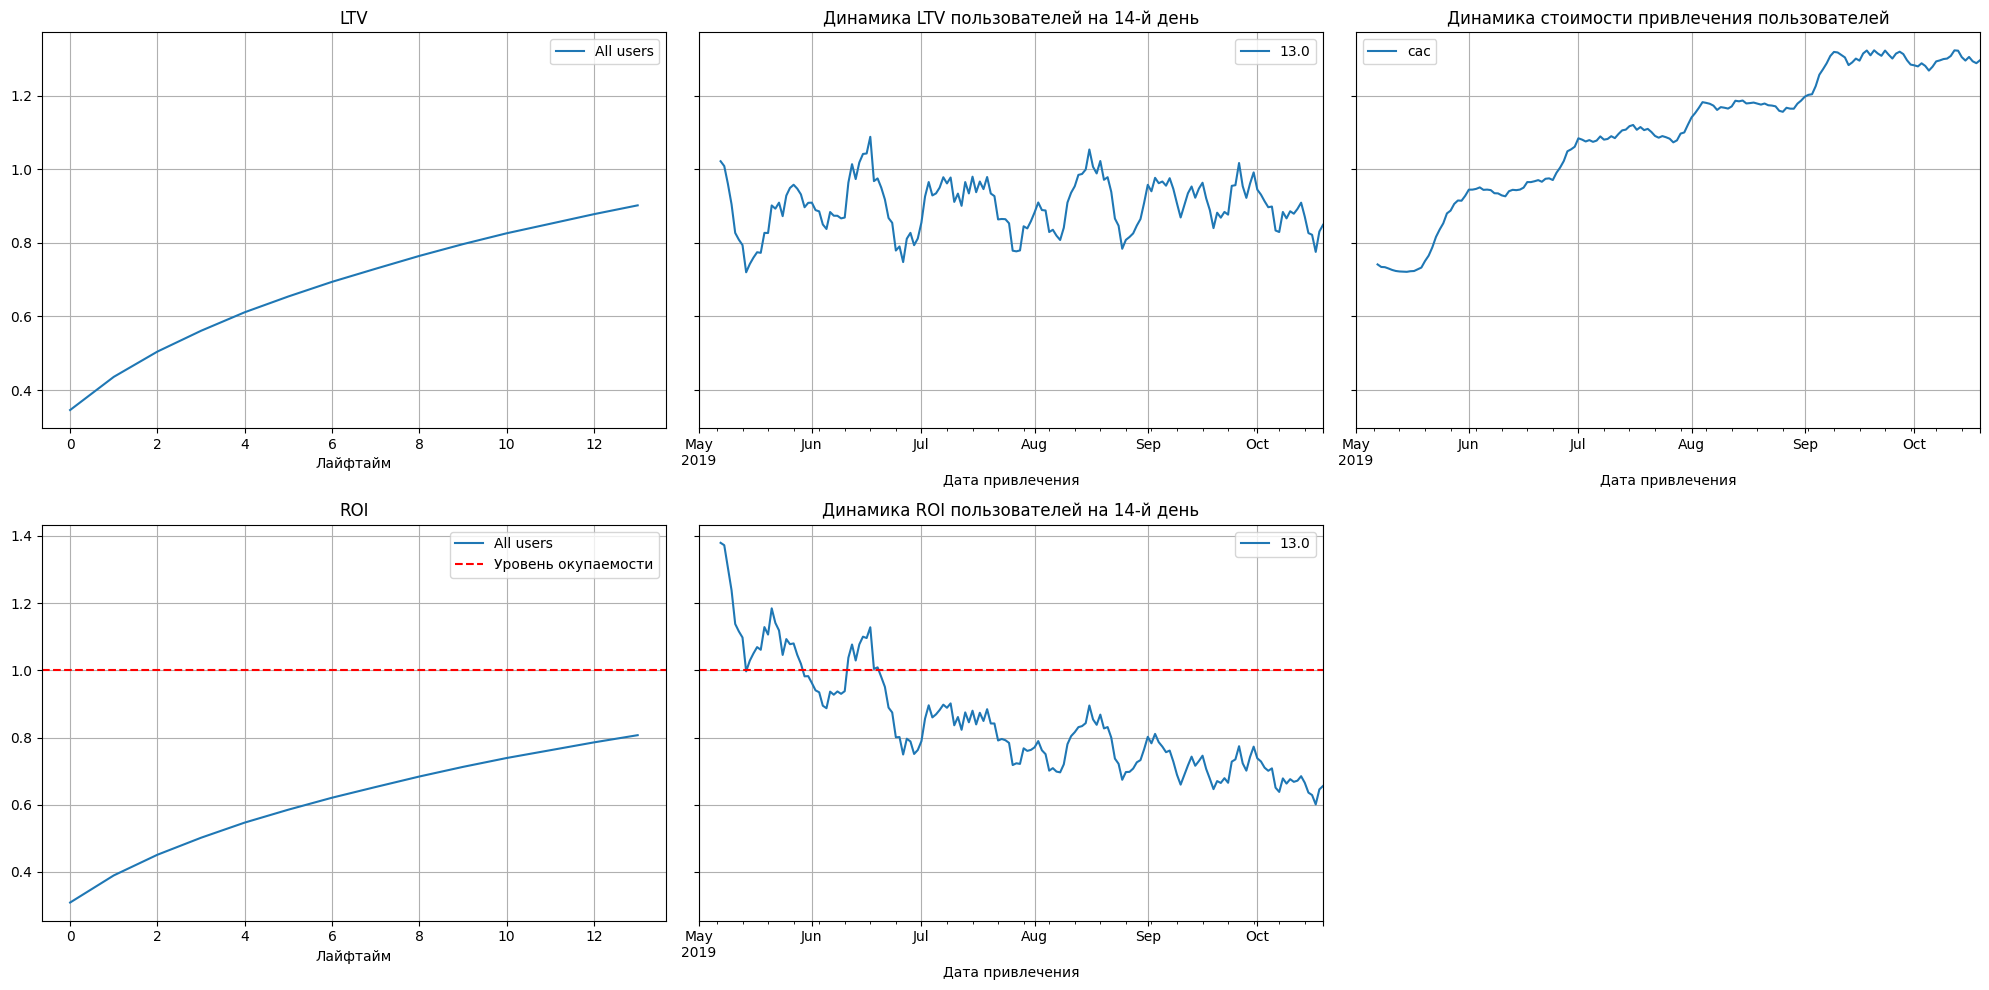

In [40]:
observation_date = datetime(2019, 11,1).date() #момент анализа
horizon_days = 14 #горизонт анализа
profiles = profiles.query('channel != "organic"') # исключаем органических пользователей

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать такие выводы:
* LTV стабильно растет.
* По графику динамики LTV на 14-й день видно, что LTV растет с начала месяца, достигает пика к середине и затем падает. Данная закономерность прослеживается ежемесячно, но немного смещается с сентября по октябрь 2019.
* Реклама не окупается. ROI в конце недели приблизился лишь к 80%.
* Динамика ROI снижается и к октябрю 2019 выходит за пределы окупаемости (начиная с июня 2019).
* CAC рос с мая по август 2019. Затем расходы стабилизировались (сентябрь - октябрь 2019), но довольно на высоком значении.

#### 5.2. Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

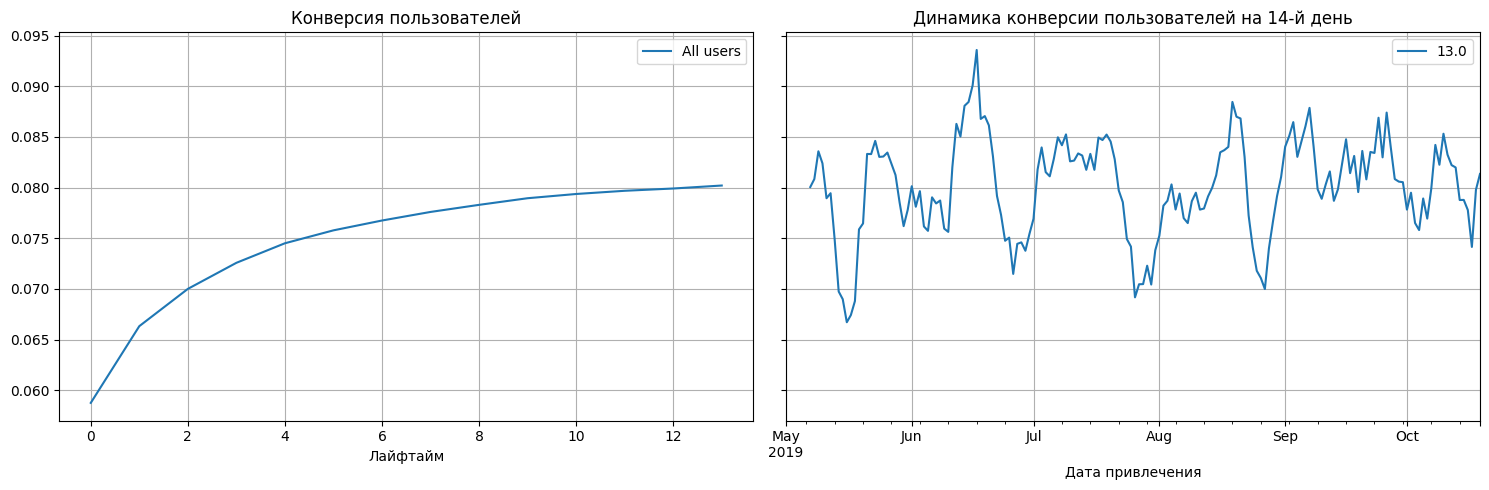

In [41]:
#строим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

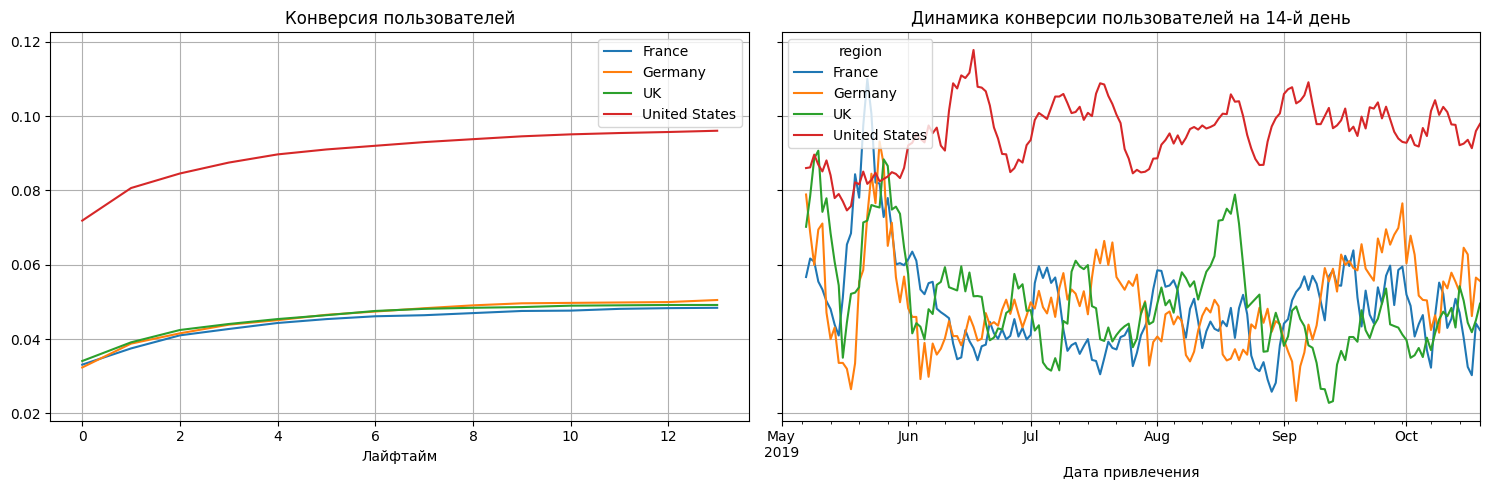

In [42]:
#строим конверсию с разбивкой по странам
dimensions=['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

На графике конверсии с разбивкой по странам видно, что пользователи из США лучше всего конверсируются в покупателей.

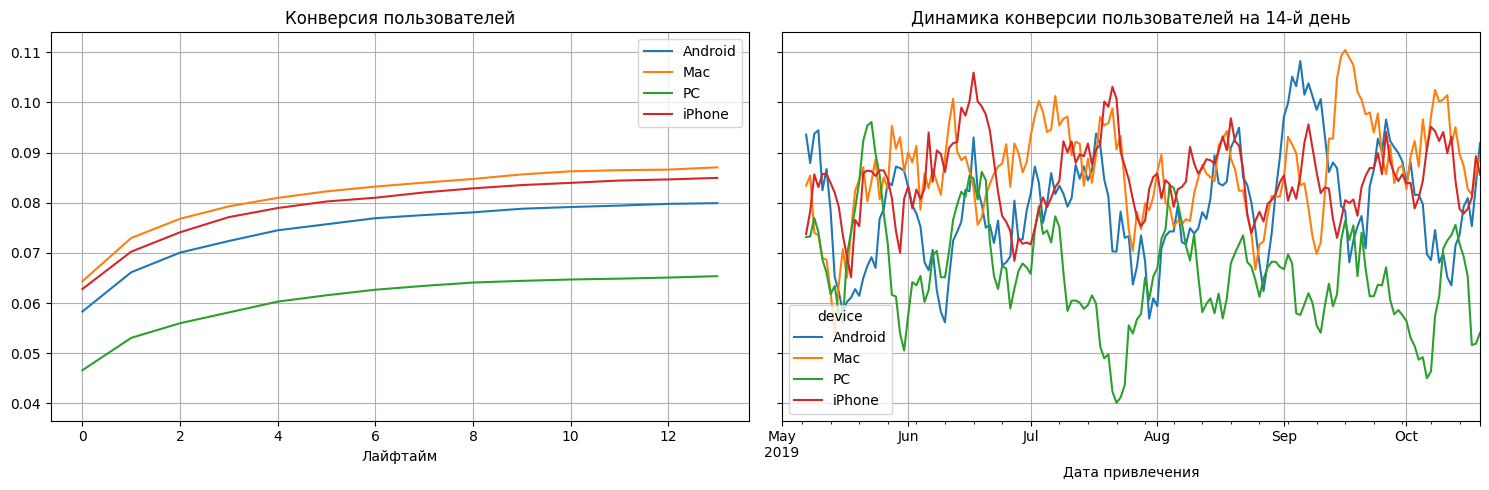

In [43]:
#строим конверсию с разбивкой по устройствам
dimensions=['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

На всех устройствах пользователи хорошо переходят в покупателей. Пользователи PC хуже всех, пользоватлеи Mac - лкчше всех. Но конверсия стабильна на всех устройствах. Явных аутсайдеров не видно.

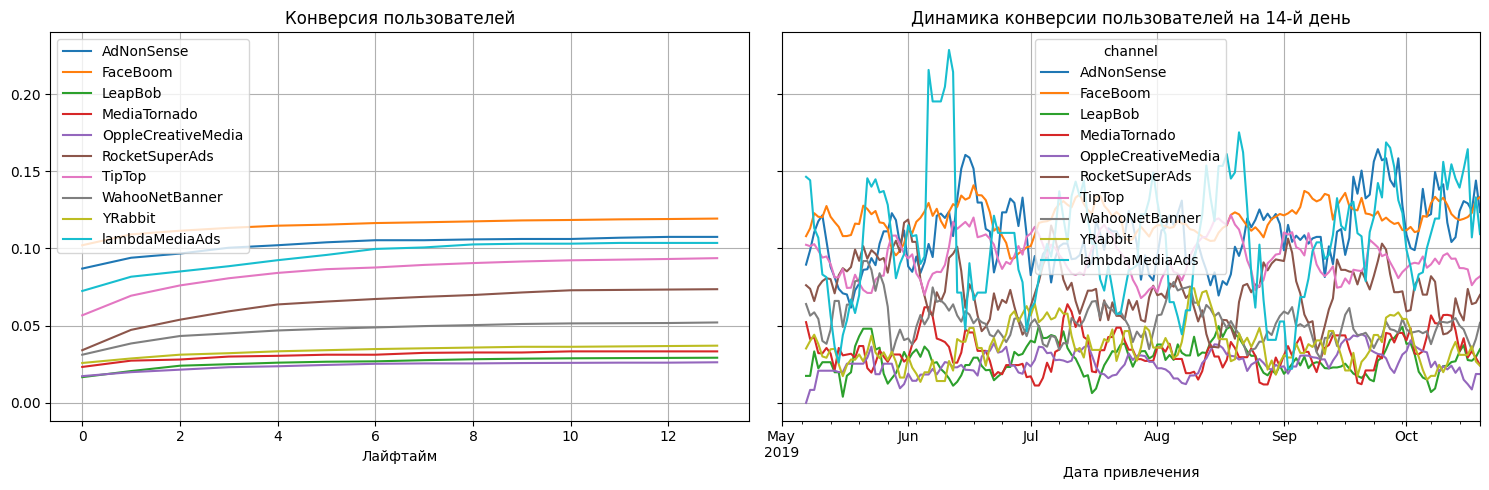

In [44]:
#строим конверсию с разбивкой по источникам рекламы
dimensions=['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Пользователи, пришедшие из рекламы на FaceBoom, AdNonSense, lambdaMediaAds, TipTop и RocketSuperAds лучше всего переходят в разряд покупателей. Хотя конверсия b не велика. Динамика конверсии самая яркая у платформы lambdaMediaAds - самые сильные колебания: максимальное значение конверсии в певрой половине июня, затем резкий спад уже в июле. Далее динамика повторяется. Аналогичная ситуация и у других платформ, но колебания не такие сильные.

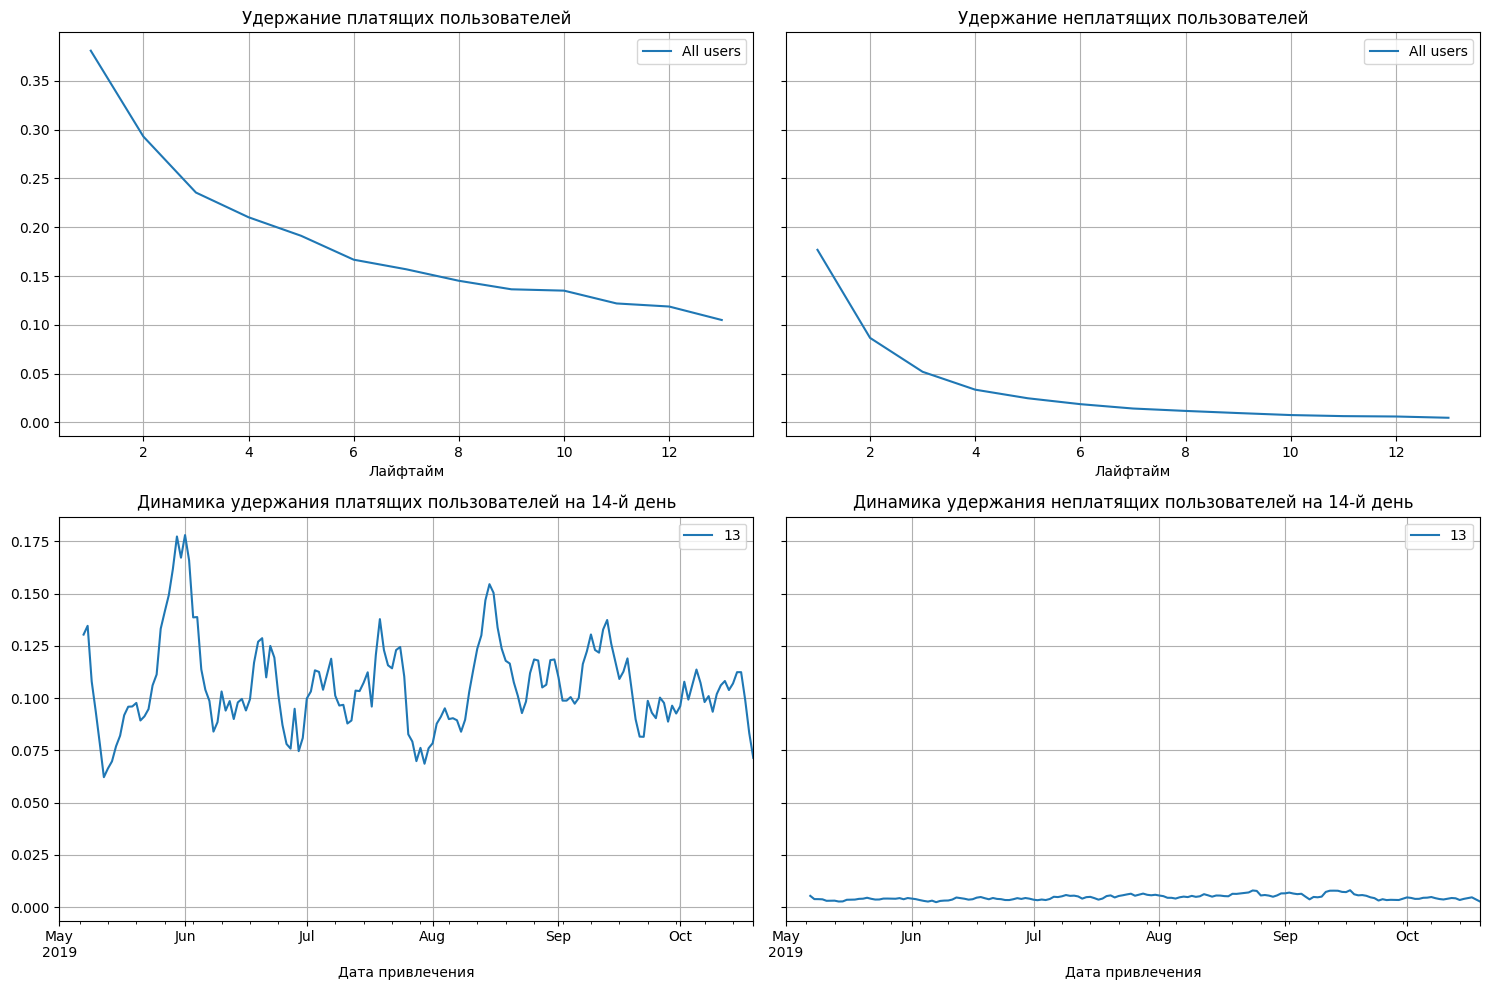

In [45]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=[]
)

plot_retention(retention_grouped, retention_history, horizon_days)

По графикам можно сделать такие выводы:
* Удержание платящих пользователей падает к 14-му дню. К середине месяца платящие достигают пика своих трат в приложении, и затем отваливаются к концу месяца. Такая динамика прослеживается ежемесячно (аналогично с динамикой LTV).
* Удержание неплатящих падает к концу 2ой недели, динамика отсутствует.

Далее будем выяснять причину неудержания платящих пользователей.

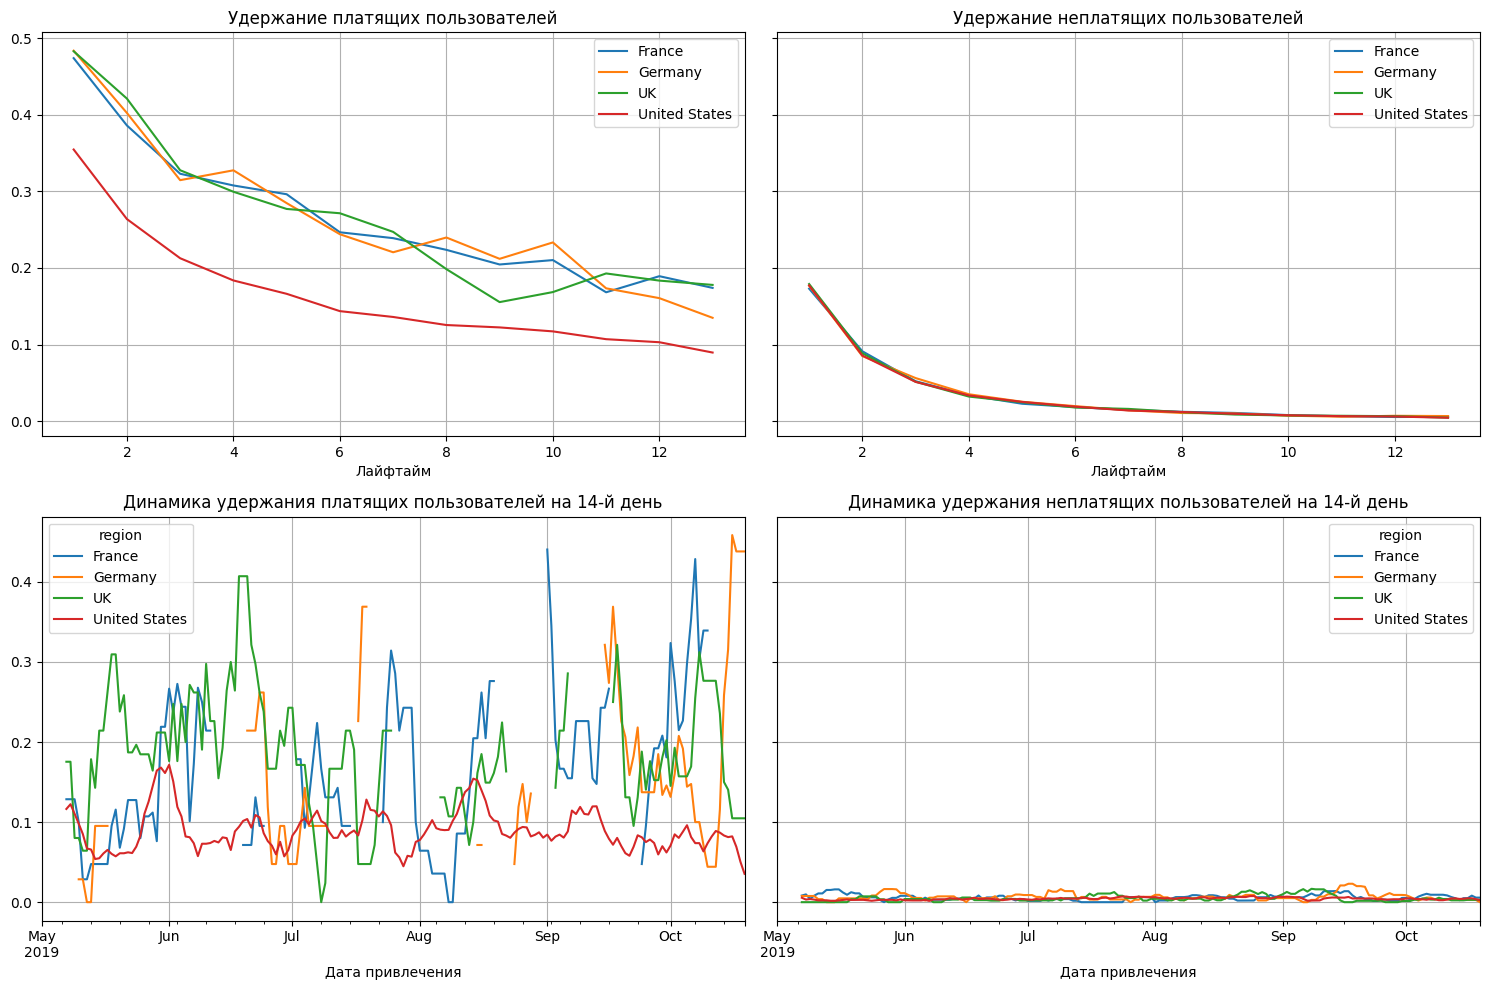

In [46]:
# смотрим удержание с разбивкой по странам
dimensions=['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Несмотря на высокую и стабильную конверсию пользователей из США, их удержание самое низкое. Возможно присутствуют технические причины, которые не дают в полной мере использовать приложение и оплачивать имеющиеся в нем возможности.

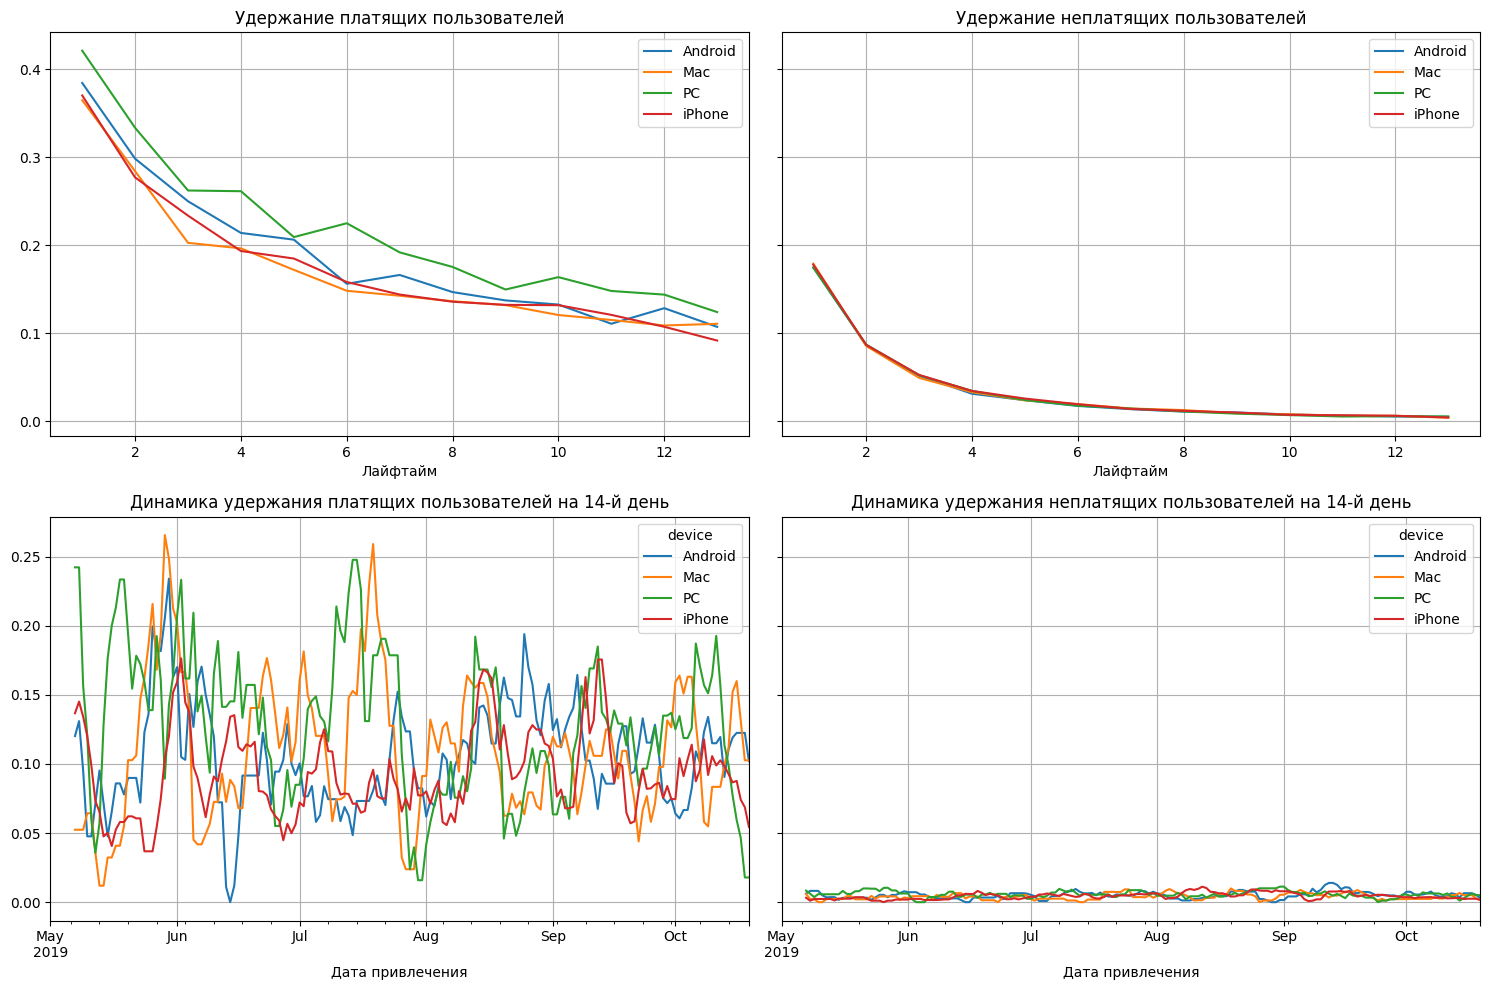

In [47]:
# смотрим удержание с разбивкой по устройствам
dimensions=['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Наряду с высокой конверсией у пользователей указанных устройств также стабильное удержание. У пользователей iPhone и Mac удержание немного хуже.

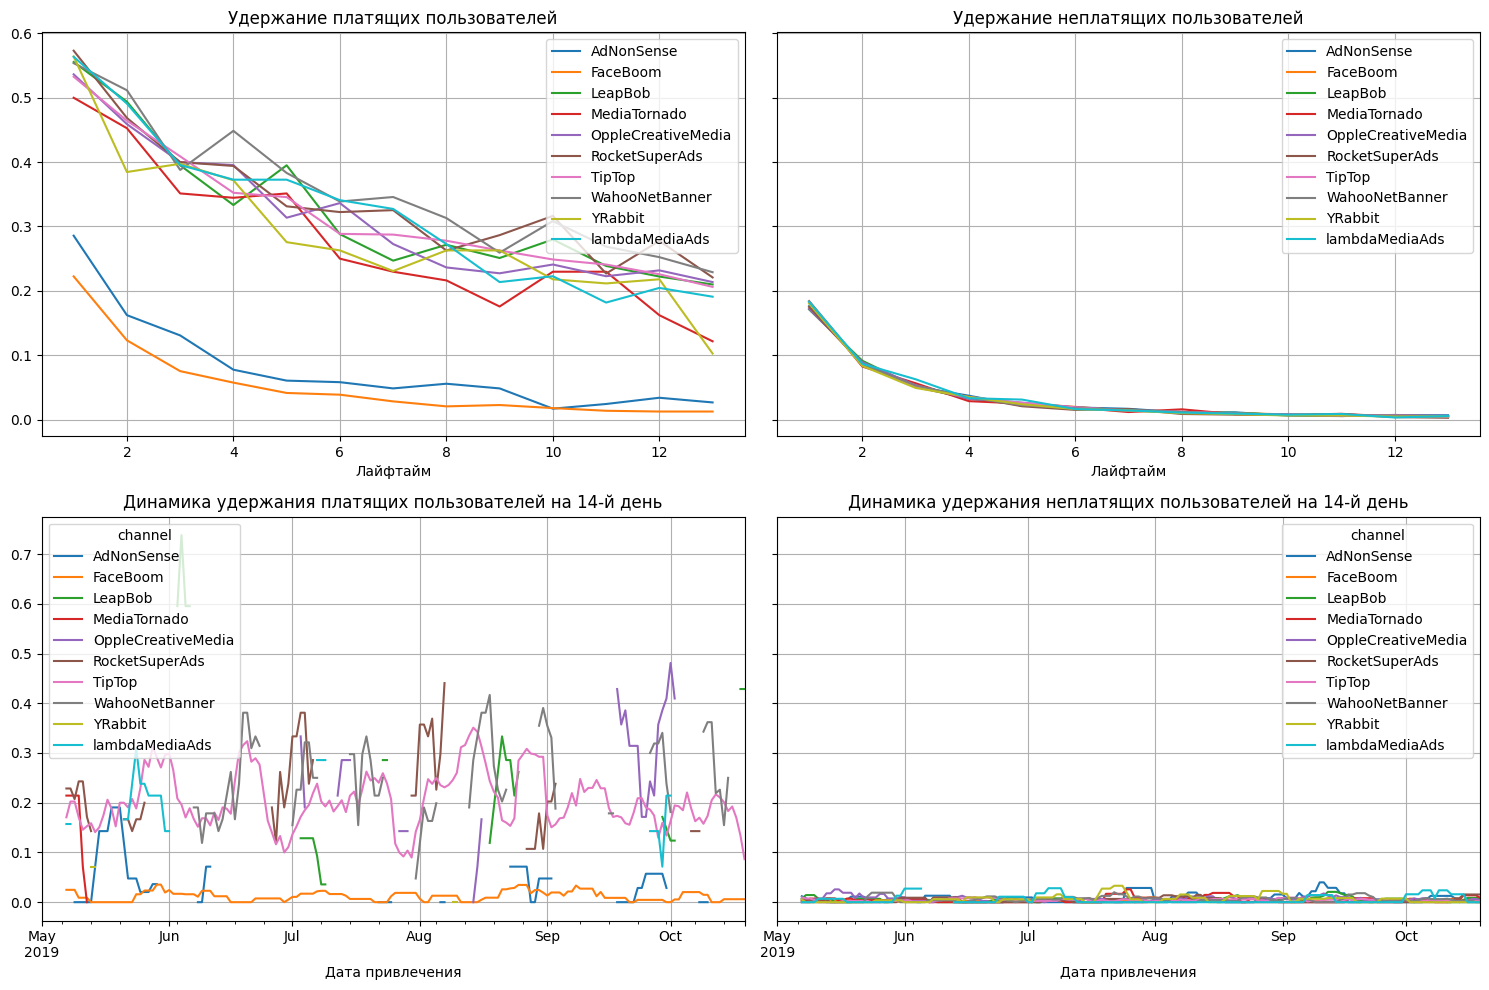

In [48]:
# смотрим удержание с разбивкой по источникам рекламы
dimensions=['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Самое низкое удержание с FaceBoom и AdNonSense.

#### 5.3. Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

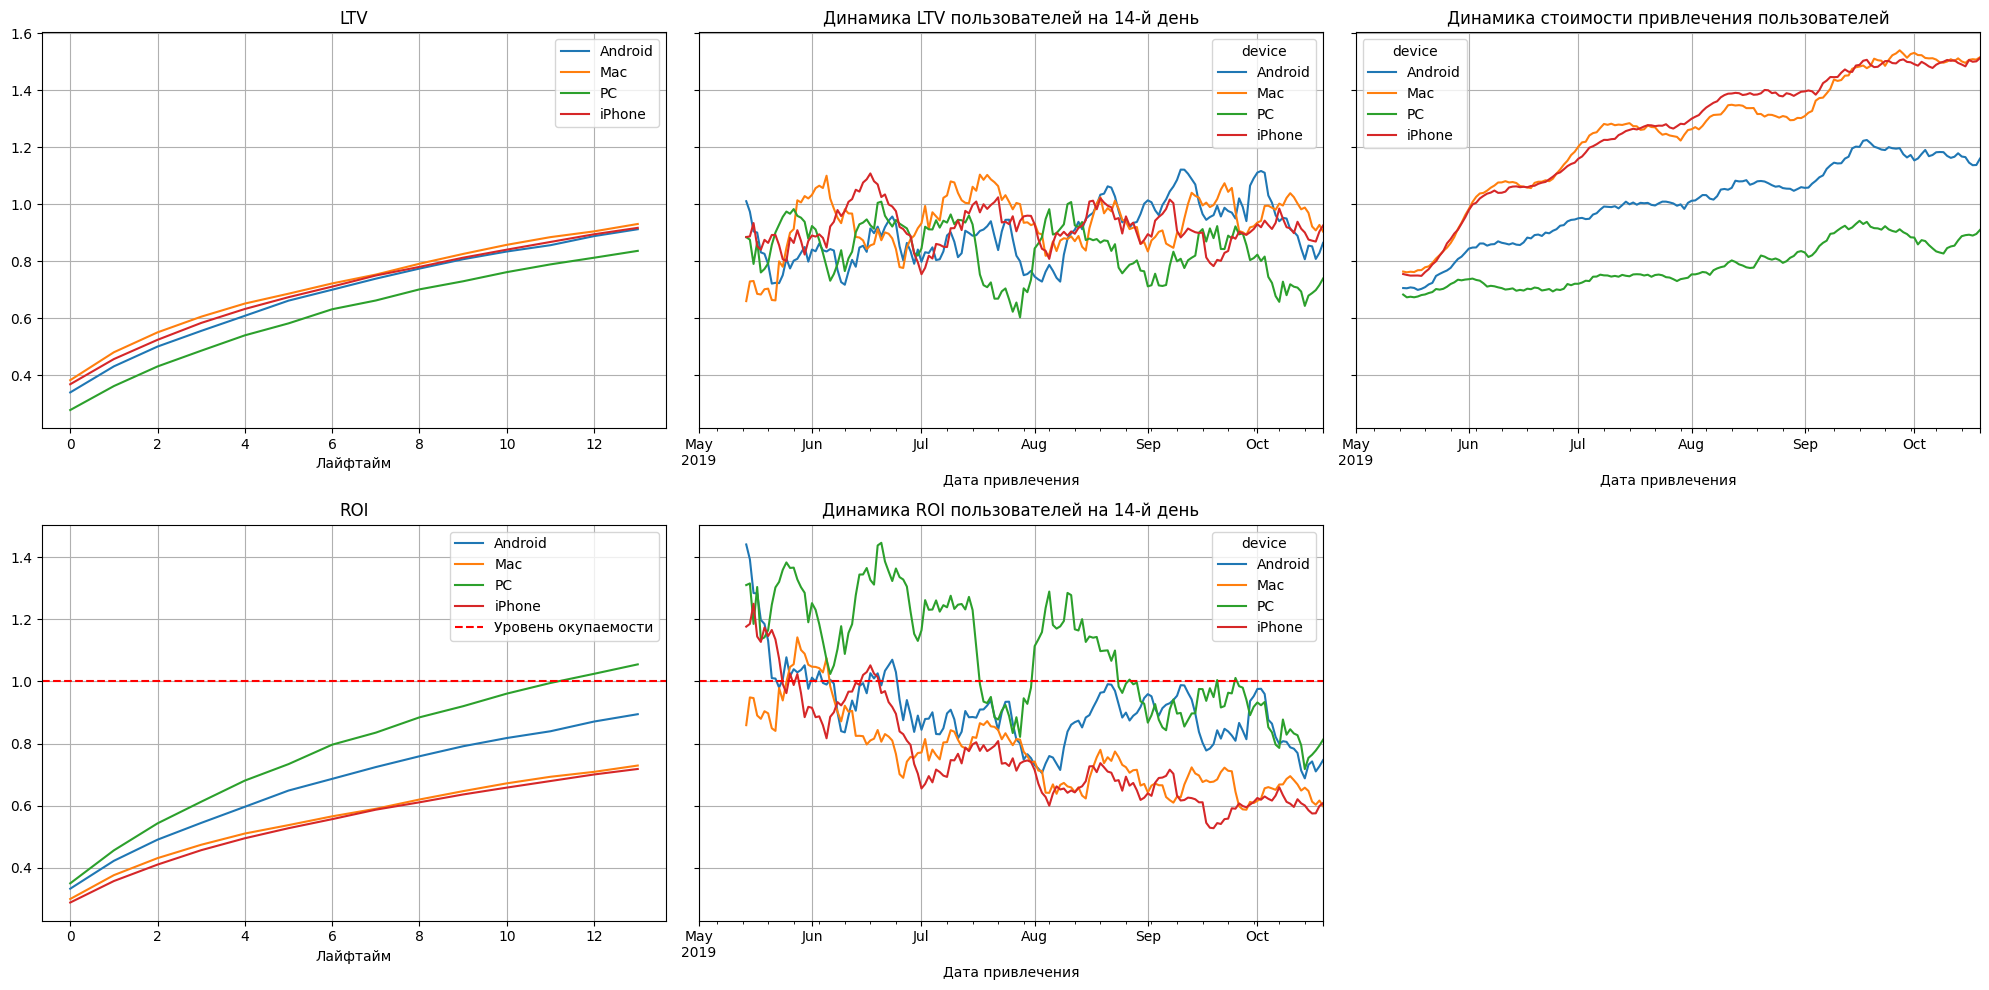

In [49]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По графикам можно сделать следующие выводы:
* Стабильное качество привлеченных пользователей, ежемесячная динамика. Самая низкая качество привлеченных пользователей, использующих PC.
* Расходы на рекламу растут для пользователей всех устройств. Больше всего у iPhone и Mac. Меньше растут расходы на реклуму для Android и PC.
* Реклама окупается только у PC, причем только в самом конце рекламной компании. Реклама для остальных устройств не окупается. Хуже всего окупается реклама у пользоватлей iPhone и Mac. Android близок к черте окупаемости, но не достигает ее.

#### 5.4. Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

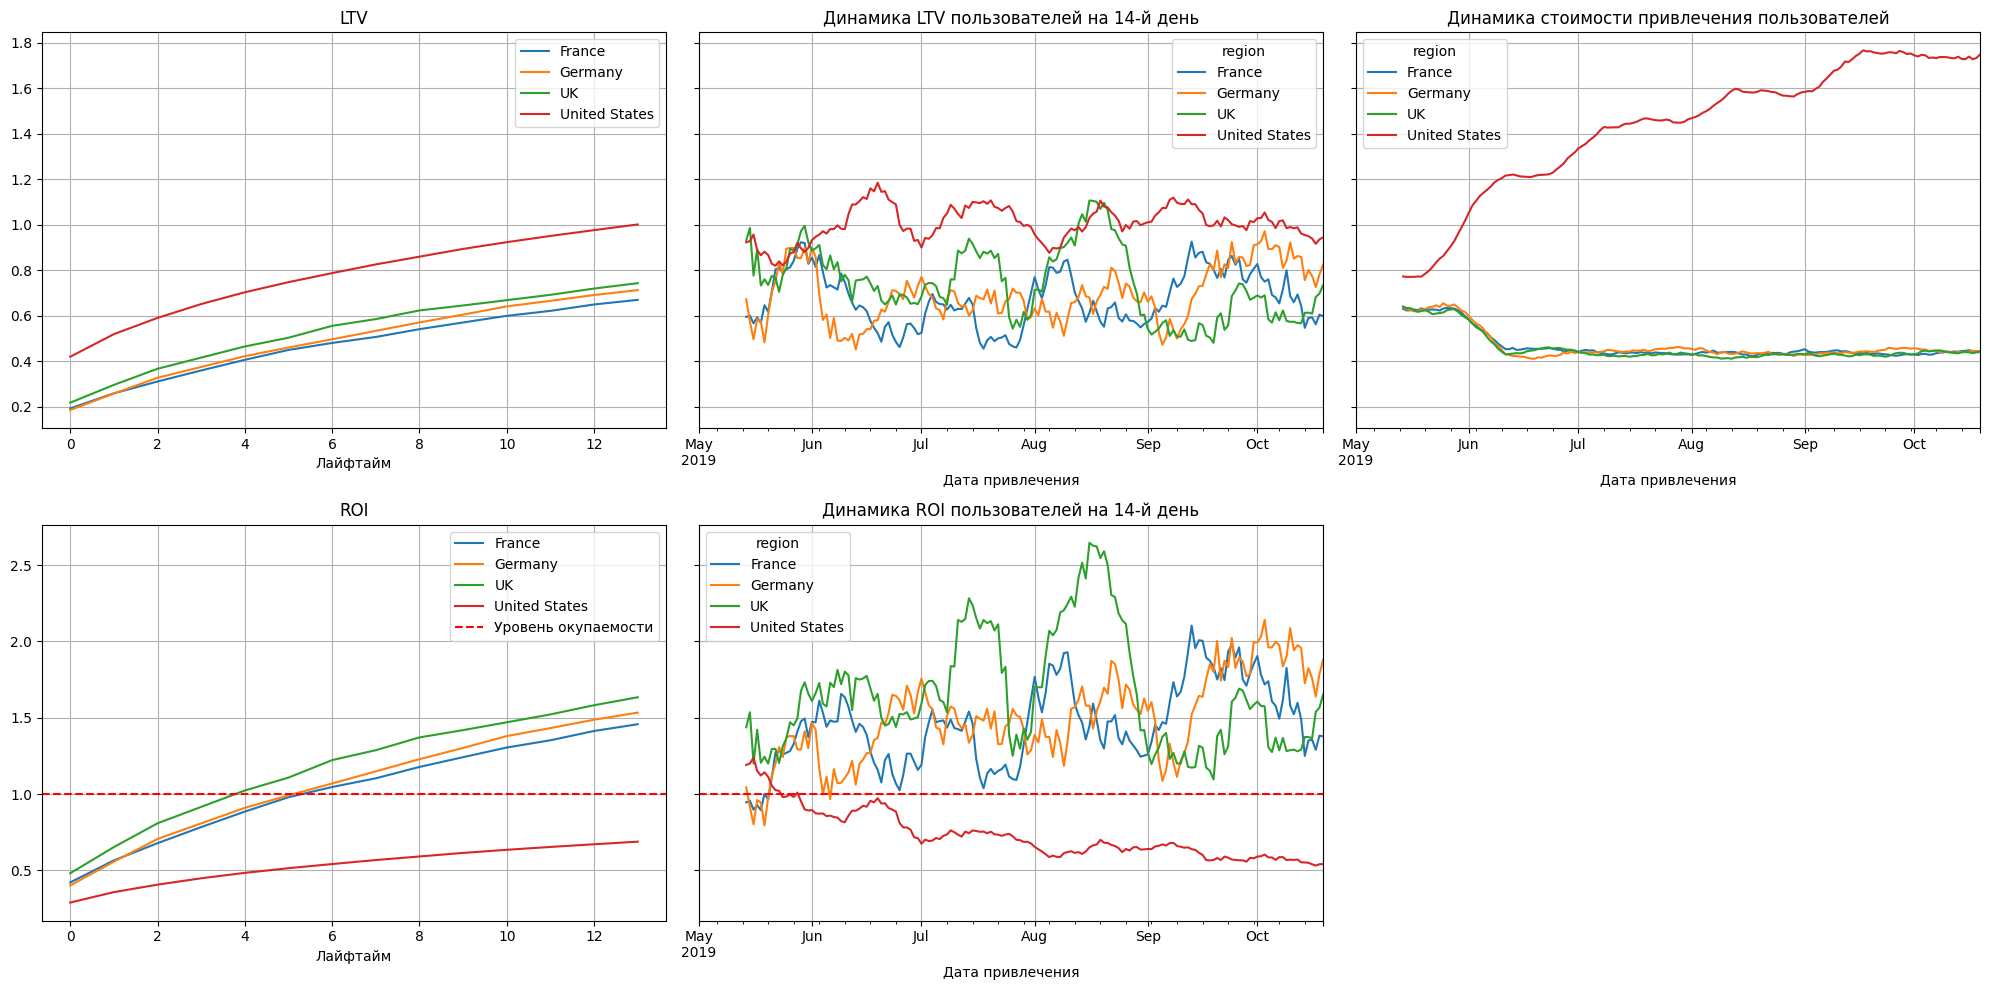

In [50]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По графикам можно сделать следующие выводы:
* Стабильное качество привлеченных пользователей, ежемесячная динамика.
* Расходы на рекламу стабильны во всех странах, кроме США. Виден очень большой рост расходов на рекламу.
* Реклама окупается везде, кроме США. Динамика пользователей отрицательная

#### 5.5. Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

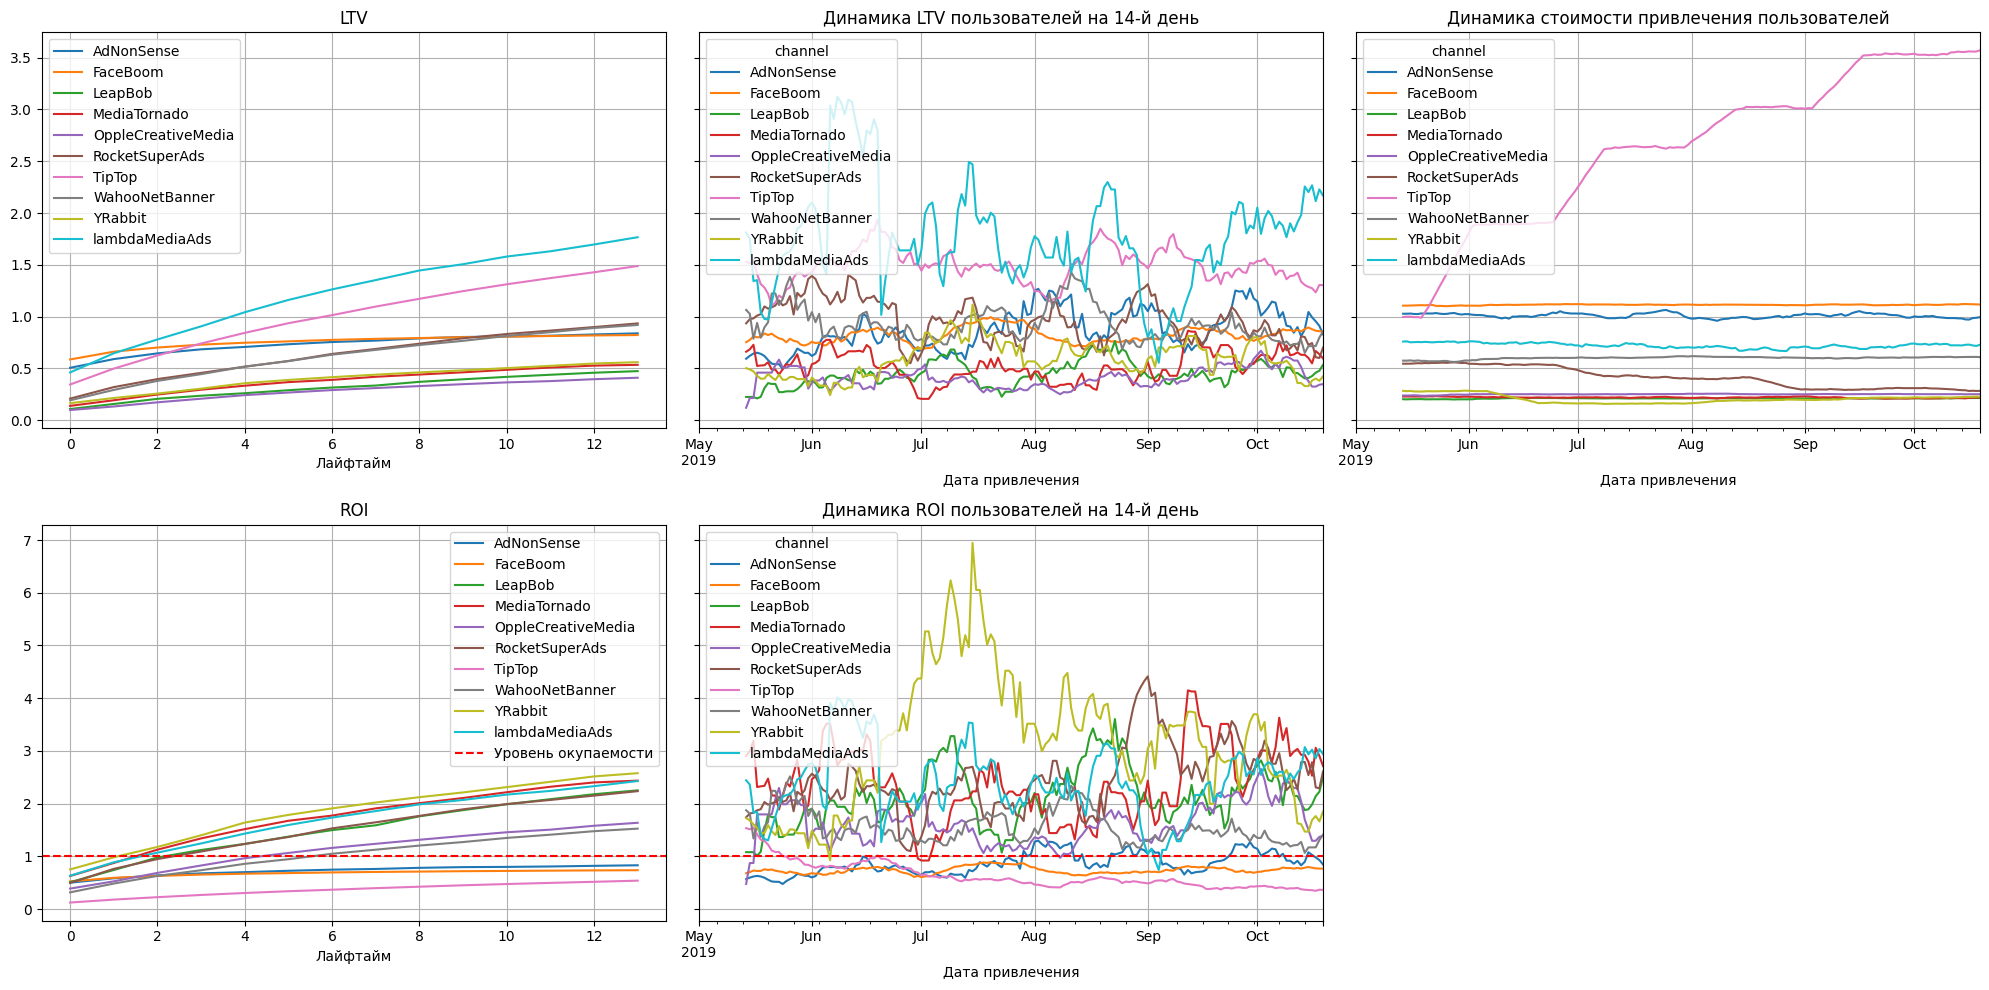

In [51]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По графикам можно сделать следующие выводы:
* Самые прибыльные пользователи приходят с рекламы на платформе lambdaMediaAds и TipTop. Все остальные, кроме FaceBoom, также качественные, но немного меньше. FaceBoom - пользователи стабильны, роста нет.
* Расходы на рекламу стабильны, кроме TipTop. Там расходы растут довольно сильно.
* В большинстве своем реклама окупается. Не окупаются AdNonSense, FaceBoom и TipTop. Несмотря на то, что с этих источников приходят довольно качественные пользователи, расходы на рекламу неоправданно высокие и не окупаются.

#### 6. Общий вывод


Реклама, направленная на привлечение пользователей в целом, не окупается. Динамика окупаемости отрицательная (снижается) к октябрю 2019.

Негативное влияние могут оказать использование рекламных каналов TipTop и FaceBoom. Реклама на них не окупается, несмотря на большие затраты.
На iPhone и Mac реклама также не окупается, несмотря на большие расходы.

Реклама для пользователей из США также не эффективна - несмотря на рос расходов, реклама не окупается.

Меньше всего приносят прибыли пользователи из США, использующие iPhone или Mac, с платформ AdNonSense, FaceBoom и TipTop.

Поскольку пользователей из США большинство, стоит выяснить причины неокупаемости рекламы у этих пользователей, причем в приложение они охотно заходят. Т.е. скорее всего проблемы возникают в процессе использования приложения. Возможно у пользователей именно этой страны есть пролемы с оплатой.

Для пользователей Android, iPhone и Mac реклама не окупается. Возможно это связано также с техническими проблемам при попытке оплатить ту или иную функцию в приложении. Это приводит к плохому удержанию пользователей.

По поводу платформ: поскольку не окупаются самые популярные платформы, возможно проблема также технического характера.